# Data pre-processing

In [1]:
import glob
import pandas as pd
import os
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
ORIGINAL_DIR = "../Original-Data"
ANALYSIS_DIR = "../Analysis-Data"

In [3]:
all_files = glob.glob(os.path.join(ORIGINAL_DIR,"*2017.csv")) 
all_data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [4]:
all_data.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,94.0,101837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,92.0,101834.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,94.0,101832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pm10_df = all_data.filter(regex='UTC time|pm10')
pm10_df.shape

(8593, 57)

In [6]:
pm10_df.head()

,UTC time,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,...,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
0,2017-04-01T00:00:00,NaN,104.0,NaN,94.0,71.0,82.0,86.0,90.0,79.0,...,73.0,53.0,82.0,89.0,73.0,78.0,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,107.0,NaN,99.0,70.0,77.0,78.0,88.0,76.0,...,70.0,46.0,87.0,57.0,51.0,83.0,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,98.0,NaN,103.0,75.0,73.0,73.0,89.0,77.0,...,66.0,35.0,85.0,50.0,47.0,91.0,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,93.0,NaN,100.0,78.0,80.0,69.0,90.0,66.0,...,64.0,33.0,83.0,60.0,50.0,92.0,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,89.0,NaN,101.0,71.0,87.0,69.0,90.0,69.0,...,61.0,37.0,79.0,69.0,55.0,95.0,NaN,NaN,NaN,NaN


In [7]:
#According to 'Tidy data' rules
pm10_df_with_id = pd.DataFrame(columns=['UTC time', 'pm10', 'id'])
for col_name in pm10_df.iloc[:, 1:]:
    df_with_id = pd.DataFrame(columns=['UTC time', 'pm10', 'id'])
    df_with_id['UTC time'] = pm10_df['UTC time']
    df_with_id['pm10'] = pm10_df[col_name]
    df_with_id['id'] = col_name
    pm10_df_with_id = pm10_df_with_id.append(df_with_id)

In [8]:
pm10_df_with_id.shape

(481208, 3)

In [9]:
pm10_df_with_id.head()

,UTC time,pm10,id
0,2017-04-01T00:00:00,NaN,3_pm10
1,2017-04-01T01:00:00,NaN,3_pm10
2,2017-04-01T02:00:00,NaN,3_pm10
3,2017-04-01T03:00:00,NaN,3_pm10
4,2017-04-01T04:00:00,NaN,3_pm10


In [10]:
pm10_df_with_id.id = pm10_df_with_id.id.str.replace('_pm10','').astype(int)

In [11]:
pm10_df_with_id.head()

,UTC time,pm10,id
0,2017-04-01T00:00:00,NaN,3
1,2017-04-01T01:00:00,NaN,3
2,2017-04-01T02:00:00,NaN,3
3,2017-04-01T03:00:00,NaN,3
4,2017-04-01T04:00:00,NaN,3


In [12]:
sensors = pd.read_csv(f"{ORIGINAL_DIR}/sensor_locations.csv")
sensors.head()

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066
3,147,50.048924,19.962262
4,169,50.048699,20.101569


In [13]:
cleaned_data = (pm10_df_with_id.merge(sensors, left_on='id', right_on='id')
       .reindex(columns=['UTC time', 'pm10', 'id', 'latitude', 'longitude']))

In [14]:
cleaned_data.head()

,UTC time,pm10,id,latitude,longitude
0,2017-04-01T00:00:00,NaN,3,50.057748,19.961375
1,2017-04-01T01:00:00,NaN,3,50.057748,19.961375
2,2017-04-01T02:00:00,NaN,3,50.057748,19.961375
3,2017-04-01T03:00:00,NaN,3,50.057748,19.961375
4,2017-04-01T04:00:00,NaN,3,50.057748,19.961375


In [15]:
#Remove unnecessary columns
cleaned_data.drop('id', inplace=True, axis=1)

In [16]:
cleaned_data.head()

,UTC time,pm10,latitude,longitude
0,2017-04-01T00:00:00,NaN,50.057748,19.961375
1,2017-04-01T01:00:00,NaN,50.057748,19.961375
2,2017-04-01T02:00:00,NaN,50.057748,19.961375
3,2017-04-01T03:00:00,NaN,50.057748,19.961375
4,2017-04-01T04:00:00,NaN,50.057748,19.961375


In [17]:
cleaned_data['pm10'].isnull().sum()

92832

In [18]:
#Remove missing rows
cleaned_data.dropna(subset = ["pm10"], inplace=True)

In [19]:
cleaned_data.rename(columns={'UTC time': 'datetime'}, inplace=True)
cleaned_data.datetime = pd.to_datetime(cleaned_data.datetime)
cleaned_data.head()

,datetime,pm10,latitude,longitude
2041,2017-02-01 00:00:00,155.0,50.057748,19.961375
2042,2017-02-01 01:00:00,165.0,50.057748,19.961375
2043,2017-02-01 02:00:00,170.0,50.057748,19.961375
2044,2017-02-01 03:00:00,186.0,50.057748,19.961375
2045,2017-02-01 04:00:00,191.0,50.057748,19.961375


In [20]:
cleaned_data.shape

(388376, 4)

In [21]:
cleaned_data['datetime'].value_counts()

2017-03-17 13:00:00    50
2017-03-23 11:00:00    50
2017-03-23 21:00:00    50
2017-03-20 05:00:00    50
2017-02-28 21:00:00    50
                       ..
2017-06-13 14:00:00    17
2017-06-21 15:00:00     8
2017-06-21 17:00:00     8
2017-06-21 16:00:00     8
2017-06-21 14:00:00     8
Name: datetime, Length: 8593, dtype: int64

# Algorithm

In [22]:
from photutils.utils import ShepardIDWInterpolator as idw
from sklearn.model_selection import train_test_split
from typing import NewType
import matplotlib.pyplot as plt

In [23]:
def get_data(dataframe, time):
    return dataframe.loc[dataframe.datetime == time]

**Hyperparameters tuning**

The Shepard interpolator has an available number of parameters that are listed in the documentation.

https://photutils.readthedocs.io/en/stable/api/photutils.utils.ShepardIDWInterpolator.html

**We will adjust the following parameters:**

_n\_neighbors_ -> The maximum number of nearest neighbors to use during the interpolation

_power_ -> The power of the inverse distance used for the interpolation weights.

I chose _2017-03-17 13:00:00_  because it contains the most data (50 samples)

In [24]:
MAX_NEIGHBORS = 15
POWER_RANGE = np.arange(0.1, 1.0, 0.1)

In [25]:
selected = get_data(cleaned_data, '2017-03-17 13:00:00')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected[["latitude","longitude"]].values, 
                                                    selected["pm10"].values, test_size=0.2, random_state=42)

In [27]:
# Run idw interpolator
f = idw(X_train, y_train)

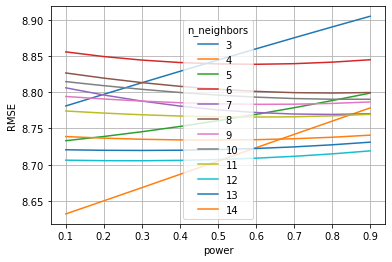

In [28]:
for n_neighbors in range(3, MAX_NEIGHBORS):
    power_list=[]
    rmse_list=[]
    for power in POWER_RANGE:
        predictions = f(X_test, n_neighbors = n_neighbors, power = power)
        rmse = mean_squared_error(y_test, predictions, squared = False)
        power_list.append(power)
        rmse_list.append(rmse)
    plt.plot(power_list, rmse_list, label=n_neighbors)
plt.grid()
plt.xlabel('power')
plt.ylabel('RMSE')
plt.legend(title="n_neighbors")
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

We can notice that the model achieves satisfactory results for n_neighbors equal to 4 and the model is not very complex.

_We will now check which value of the power parameter will produce the best results for n_neihbors equal to 4._

n_neighbors: 3
power 		 rmse
0.1 		 8.7810
0.2 		 8.7971
0.3 		 8.8130
0.4 		 8.8288
0.5 		 8.8444
0.6 		 8.8598
0.7 		 8.8750
0.8 		 8.8900
0.9 		 8.9047


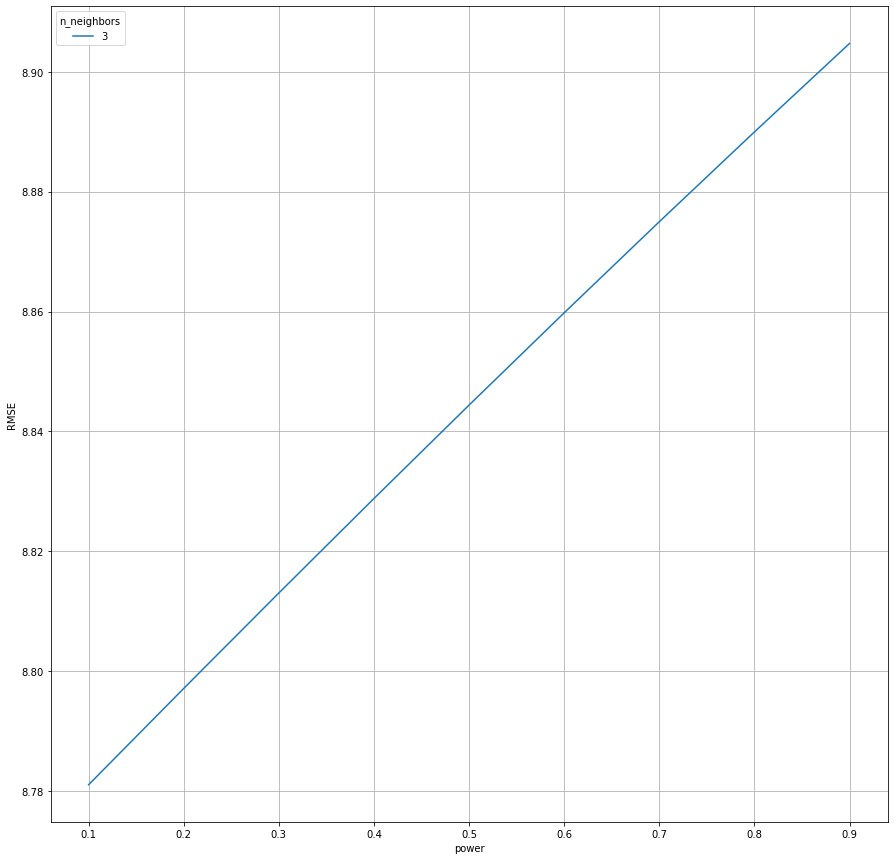

n_neighbors: 4
power 		 rmse
0.1 		 8.6322
0.2 		 8.6502
0.3 		 8.6684
0.4 		 8.6867
0.5 		 8.7050
0.6 		 8.7234
0.7 		 8.7418
0.8 		 8.7601
0.9 		 8.7783


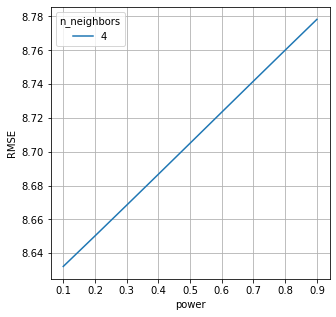

n_neighbors: 5
power 		 rmse
0.1 		 8.7331
0.2 		 8.7389
0.3 		 8.7455
0.4 		 8.7528
0.5 		 8.7607
0.6 		 8.7694
0.7 		 8.7786
0.8 		 8.7884
0.9 		 8.7988


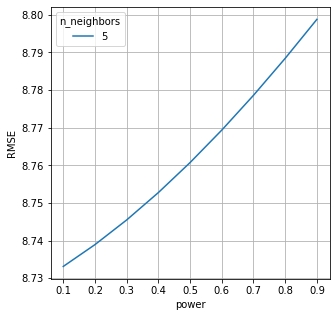

n_neighbors: 6
power 		 rmse
0.1 		 8.8556
0.2 		 8.8492
0.3 		 8.8443
0.4 		 8.8409
0.5 		 8.8390
0.6 		 8.8385
0.7 		 8.8393
0.8 		 8.8414
0.9 		 8.8447


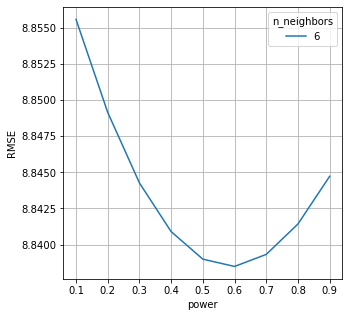

n_neighbors: 7
power 		 rmse
0.1 		 8.8060
0.2 		 8.7961
0.3 		 8.7877
0.4 		 8.7809
0.5 		 8.7756
0.6 		 8.7720
0.7 		 8.7699
0.8 		 8.7694
0.9 		 8.7703


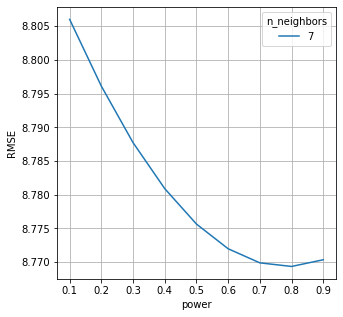

n_neighbors: 8
power 		 rmse
0.1 		 8.8265
0.2 		 8.8194
0.3 		 8.8132
0.4 		 8.8081
0.5 		 8.8040
0.6 		 8.8011
0.7 		 8.7994
0.8 		 8.7989
0.9 		 8.7995


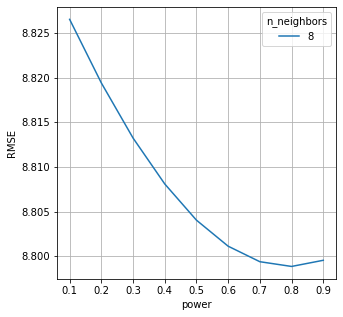

n_neighbors: 9
power 		 rmse
0.1 		 8.7941
0.2 		 8.7906
0.3 		 8.7877
0.4 		 8.7855
0.5 		 8.7840
0.6 		 8.7833
0.7 		 8.7835
0.8 		 8.7845
0.9 		 8.7865


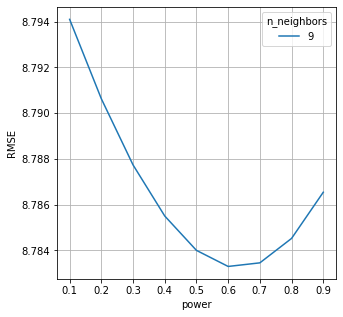

n_neighbors: 10
power 		 rmse
0.1 		 8.8146
0.2 		 8.8090
0.3 		 8.8040
0.4 		 8.7996
0.5 		 8.7960
0.6 		 8.7932
0.7 		 8.7913
0.8 		 8.7903
0.9 		 8.7903


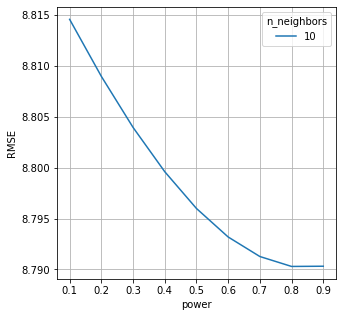

n_neighbors: 11
power 		 rmse
0.1 		 8.7741
0.2 		 8.7712
0.3 		 8.7689
0.4 		 8.7671
0.5 		 8.7661
0.6 		 8.7657
0.7 		 8.7661
0.8 		 8.7674
0.9 		 8.7695


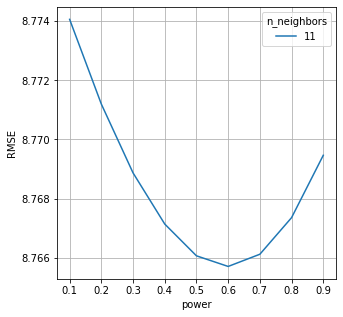

n_neighbors: 12
power 		 rmse
0.1 		 8.7063
0.2 		 8.7056
0.3 		 8.7055
0.4 		 8.7060
0.5 		 8.7072
0.6 		 8.7090
0.7 		 8.7116
0.8 		 8.7149
0.9 		 8.7191


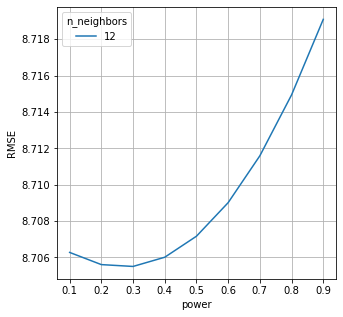

n_neighbors: 13
power 		 rmse
0.1 		 8.7206
0.2 		 8.7199
0.3 		 8.7197
0.4 		 8.7200
0.5 		 8.7209
0.6 		 8.7224
0.7 		 8.7246
0.8 		 8.7275
0.9 		 8.7311


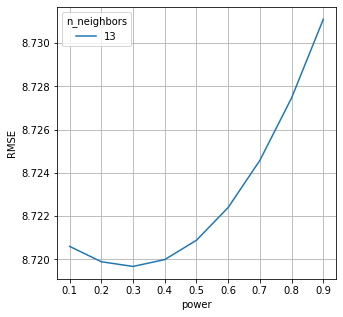

n_neighbors: 14
power 		 rmse
0.1 		 8.7388
0.2 		 8.7366
0.3 		 8.7351
0.4 		 8.7342
0.5 		 8.7340
0.6 		 8.7345
0.7 		 8.7358
0.8 		 8.7379
0.9 		 8.7408


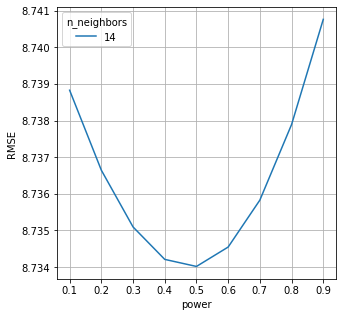

In [29]:
for n_neighbors in range(3, MAX_NEIGHBORS):
    power_list=[]
    rmse_list=[]
    print(f"n_neighbors: {n_neighbors}")
    print(f"power \t\t rmse")
    for power in POWER_RANGE:
        predictions = f(X_test, n_neighbors = n_neighbors, power = power)
        rmse = mean_squared_error(y_test, predictions, squared = False)
        power_list.append(power)
        rmse_list.append(rmse)
        print(f"{power:.1f} \t\t {rmse:.4f}")
    plt.plot(power_list, rmse_list, label=n_neighbors)
    plt.grid()
    plt.xlabel('power')
    plt.ylabel('RMSE')
    plt.legend(title="n_neighbors")
    plt.rcParams["figure.figsize"] = (5,5)
    plt.show()

**Summing up the best interpolation result was obtained for the n-neighbors parameters equal to 4 and for the variable power equal to 0.1.**